In [16]:
import pandas as pd

class Matches:
    def __init__(self, file_name: str) -> None:
        assert isinstance(file_name, str)
        self.file = pd.read_csv(file_name)

    def get_frame(self, cols: list) -> pd.DataFrame:
        assert isinstance(cols, list)
        if set(cols).issubset(self.file.columns):
            return pd.DataFrame(self.file, columns=cols)
        else:
            return -1


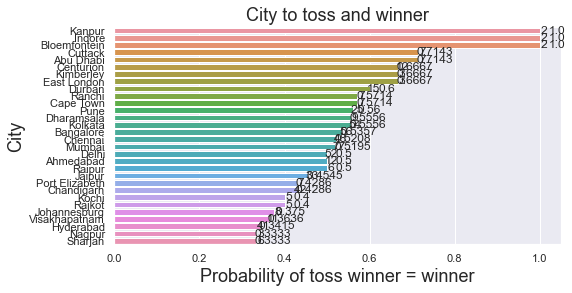

              city  win_rate  win  competition
15          Kanpur    1.0000    2            2
6           Indore    1.0000    2            2
25    Bloemfontein    1.0000    2            2
2          Cuttack    0.7143    5            7
10       Abu Dhabi    0.7143    5            7
19       Centurion    0.6667    8           12
29       Kimberley    0.6667    2            3
5      East London    0.6667    2            3
22          Durban    0.6000    9           15
0           Ranchi    0.5714    4            7
24       Cape Town    0.5714    4            7
4             Pune    0.5600   14           25
27      Dharamsala    0.5556    5            9
26         Kolkata    0.5556   30           54
20       Bangalore    0.5357   30           56
28         Chennai    0.5208   25           48
14          Mumbai    0.5195   40           77
11           Delhi    0.5000   26           52
13       Ahmedabad    0.5000    6           12
23          Raipur    0.5000    3            6
21          J

In [21]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
#from data_process import Matches


def city_toss_winner(city):

    assert isinstance(city, str)

    # load and select specific data
    matches = Matches(file_name="..\data\matches.csv")
    cols = ['city', 'toss_winner', 'winner']
    df = matches.get_frame(cols=cols)
    df.fillna("missing",inplace=True)

    # check input is valid or not
    cities = set(df['city'])
    if city not in cities:
        print("You enter a city not in our dataset, try again!")
        return -1

    city_df = df.loc[df['city'] == city]

    wr,cn,wn = calculate_wr(city_df=city_df)

    return wr,cn,wn

def calculate_wr(city_df):
    competition_num = len(city_df)
    win_num = 0
    for row in city_df.iterrows():
        if row[1]['winner'] == "missing":
            competition_num-=1
            continue
        if row[1]['toss_winner'] == row[1]['winner']:
            win_num += 1
    #print(win_num,competition_num)
    return round(win_num/competition_num,4), competition_num, win_num


def city_toss_winner_graph():
    matches = Matches(file_name="..\data\matches.csv")
    cols = ['city', 'toss_winner', 'winner']
    df = matches.get_frame(cols=cols)
    df.fillna("missing",inplace=True)
    
    cities = set(df['city'])

    city_wr_dict = {}
    
    for city in cities:
        if city == "missing" :
            continue
        
        if city not in city_wr_dict:
            #print(city)
            wr,cn,wn=calculate_wr(df.loc[df['city'] == city])
            city_wr_dict[city]=[wr,wn,cn]
    
    city_wr_frame = pd.DataFrame.from_dict(data=city_wr_dict,orient='index',columns=['win_rate','win','competition'])
    city_wr_frame.reset_index(inplace=True)
    city_wr_frame.rename(columns={'index': 'city'},inplace=True)
    city_wr_frame.sort_values(by="win_rate",inplace=True,ascending=False)
    pic=sns.barplot(data=city_wr_frame,x='win_rate',y='city',ci=None,hue_order=city_wr_frame["win_rate"])
    i=1
    for index,row in city_wr_frame.iterrows():
        pic.text(row['win_rate']+0.01,i-0.6,row['competition'],ha="center")
        pic.text(row['win_rate']+0.04,i-0.6,row['win_rate'],ha="center")
        i+=1
    pic.set_title('City to toss and winner',fontsize=18)
    pic.set_xlabel('Probability of toss winner = winner',fontsize=18)
    pic.set_ylabel('City',fontsize=18)
    plt.show()
    print(city_wr_frame)


if __name__ == "__main__":
    #res = city_toss_winner("Bangalore")
    
    city_toss_winner_graph()
